In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [59]:
df = pd.read_csv(r"C:\Churn_Prediction\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [61]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [62]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

In [63]:
df.drop('customerID', axis=1, inplace=True)

In [64]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [65]:
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [66]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [68]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [69]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss'
)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

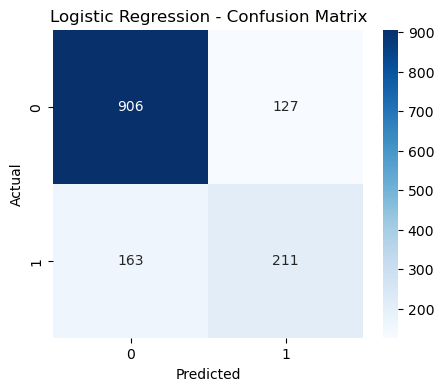

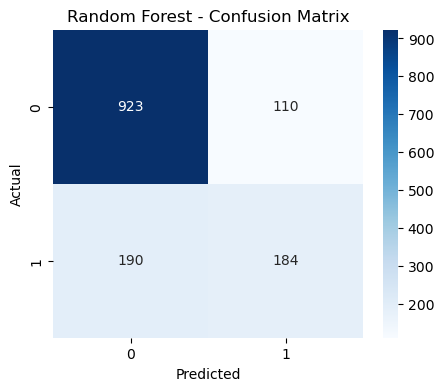

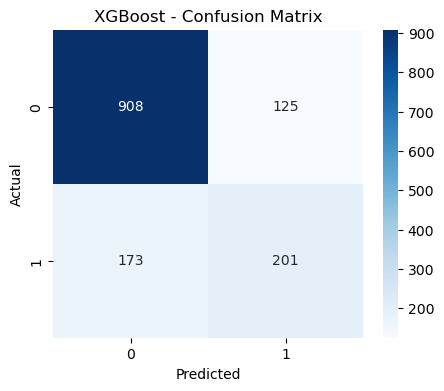

In [70]:
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()
plot_cm(y_test, lr_pred, "Logistic Regression - Confusion Matrix")
plot_cm(y_test, rf_pred, "Random Forest - Confusion Matrix")
plot_cm(y_test, xgb_pred, "XGBoost - Confusion Matrix")

In [71]:
def metrics(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred)
    }
print("Logistic:", metrics(y_test, lr_pred))
print("Random Forest:", metrics(y_test, rf_pred))
print("XGBoost:", metrics(y_test, xgb_pred))

Logistic: {'Accuracy': 0.7938877043354655, 'Precision': 0.6242603550295858, 'Recall': 0.5641711229946524, 'F1': 0.5926966292134831}
Random Forest: {'Accuracy': 0.7867803837953091, 'Precision': 0.6258503401360545, 'Recall': 0.4919786096256685, 'F1': 0.5508982035928144}
XGBoost: {'Accuracy': 0.7882018479033405, 'Precision': 0.6165644171779141, 'Recall': 0.5374331550802139, 'F1': 0.5742857142857143}


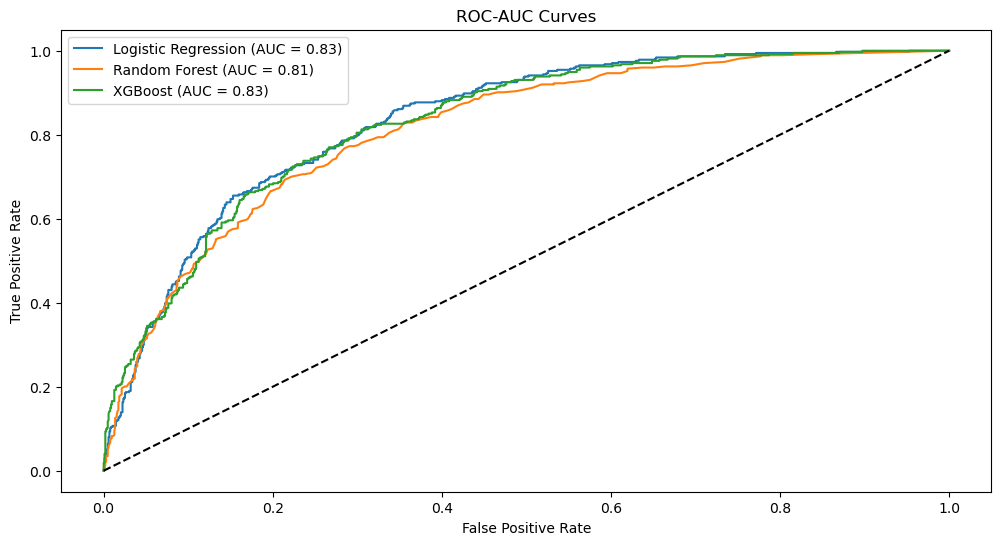

In [45]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(12,6))
for model, name in zip([lr, rf, xgb],
                       ['Logistic Regression', 'Random Forest', 'XGBoost']):
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr,tpr):.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curves")
plt.legend()
plt.show()

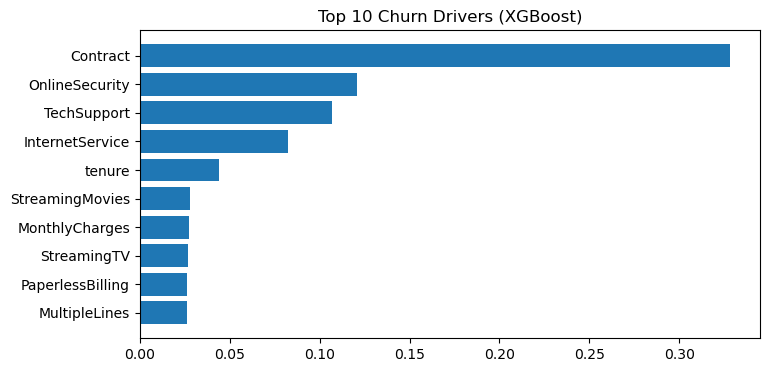

In [72]:
importances = xgb.feature_importances_
features = X.columns
fi = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.barh(fi['Feature'], fi['Importance'])
plt.gca().invert_yaxis()
plt.title("Top 10 Churn Drivers (XGBoost)")
plt.show()


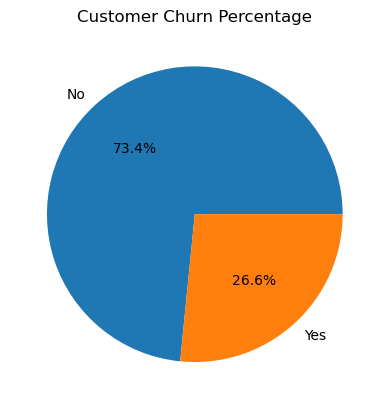

In [73]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate.plot(kind='pie', autopct='%1.1f%%', labels=['No', 'Yes'])
plt.title("Customer Churn Percentage")
plt.ylabel("")
plt.show()

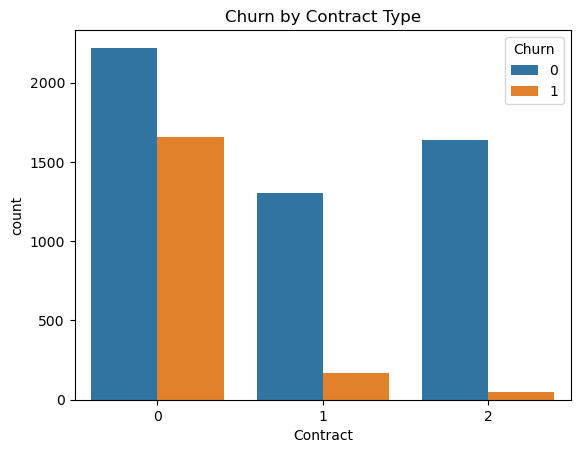

In [74]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

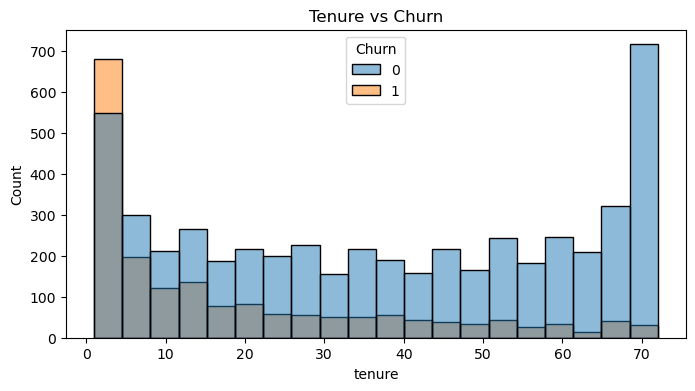

In [75]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure', hue='Churn', bins=20)
plt.title("Tenure vs Churn")
plt.show()

In [80]:
import pandas as pd

# Get XGBoost churn probabilities
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Recreate DataFrame WITH ORIGINAL COLUMN NAMES
churn_results = pd.DataFrame(
    X_test,
    columns=X.columns
)

# Add actual churn and probability
churn_results['Actual_Churn'] = y_test.reset_index(drop=True)
churn_results['Churn_Probability'] = y_prob_xgb

# Sort by highest churn risk
churn_results = churn_results.sort_values(
    by='Churn_Probability',
    ascending=False
)

# Save to CSV
churn_results.to_csv(
    "churn_predictions_with_probability.csv",
    index=False
)

In [81]:
# dashboard.py
import streamlit as st
import numpy as np

st.title("Churn Prediction System")

age = st.slider("Age", 18, 80, 30)
tenure = st.slider("Tenure", 0, 72, 12)
monthly = st.number_input("Monthly Charges", 0.0, 200.0)

if st.button("Predict Churn"):
    sample = np.array([[age, tenure, monthly] + [0]*(X.shape[1]-3)])
    sample = scaler.transform(sample)
    result = xgb.predict(sample)

    st.success("Churn Likely" if result[0]==1 else "Customer Retained")


2026-01-21 17:30:54.671 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-21 17:30:54.673 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-21 17:30:54.675 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-21 17:30:54.678 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-21 17:30:54.679 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-21 17:30:54.682 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-21 17:30:54.687 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-21 17:30:54.690 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [82]:
import os
os.getcwd()

'C:\\Users\\User'

In [83]:
churn_predictions_with_probability.columns

NameError: name 'churn_predictions_with_probability' is not defined